# Logistic Regression on titanic dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Logistic Regression](#section4)<br>
    - 4.1 [Preparing X and y using pandas](#section401)<br>
    - 4.2 [Splitting X and y into training and test dataset](#section402)<br>
    - 4.3 [Logistic regression in scikit-learn](#section403)<br>
    - 4.4 [Using the Model for Prediction](#section404)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model Evaluation using accuracy classification score](#section501)<br>
    - 5.2 [Model Evaluation using confusion matrix](#section502)<br> 

<a id=section1></a>

### 1. Problem Statement

The goal is to __predict survival__ of passengers travelling in RMS __Titanic__ using __Logistic regression__.

<a id=section2></a>

### 2. Data Loading and Description

<a id=section201></a>

- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |
| Embarked      | Port of embarkation                                       |

#### Importing packages                                          

In [ ]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
#import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()


In [ ]:
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.reset_option('^display.', silent=True)

#### Importing the Dataset

In [ ]:
data = pd.read_csv("../input/titanic-machine-learning-from-disaster/train.csv")     # Importing training dataset using pd.read_csv

In [ ]:
data.head(10)

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |
| Embarked      | Port of embarkation                                       |

In [ ]:
data.info()

<a id=section3></a>

## 3. Preprocessing the data

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ and __Fare__ with median values.
    - Dropping the column __'Cabin'__ as it has too many _null_ values.

In [ ]:
# Finding the distribution of Embarked across unique values
data.groupby(['Embarked'])['Embarked'].count()

In [ ]:
data.Embarked.mode()

In [ ]:
# Finding the mode of Embarked
data['Embarked'].mode()[0]

In [ ]:
# Filling Null values of Embarked with its mode
data.Embarked = data.Embarked.fillna(data['Embarked'].mode())

In [ ]:
data.info()

In [ ]:
data.Age.fillna(data.Age.median(), inplace = True)
data.Fare.fillna(data.Fare.median(), inplace = True)

In [ ]:
data.drop('Cabin', axis = 1,inplace = True)

In [ ]:
data.head(10)

In [ ]:
# Creating a new feature/column : "Family Size". By adding the number of children and parents
data['FamilySize'] = data['SibSp'] + data['Parch']+1

In [ ]:
data.head()

- __Dropping__ columns __'Name' , 'Ticket'  , 'SibSp' , 'PassengerId' and 'Parch'__ 

In [ ]:
drop_cols = ['Name','Ticket','SibSp','Parch','PassengerId']

In [ ]:
data.drop(drop_cols, axis = 1, inplace=True)
data.head(10)

## EDA

In [ ]:
# how many people survived
data['Survived'].sum()

In [ ]:
data.shape[0]

In [ ]:
# % of people survived
data['Survived'].sum()/data.shape[0]

In [ ]:
# what is the distribution of male and female
data.groupby(['Sex'])['Sex'].count().sort_values(ascending=False)#.plot('bar')

In [ ]:
# From where did the people embark
data.groupby(['Embarked'])['Embarked'].count().sort_values(ascending=False)

In [ ]:
# How many people stayed in each of the classes
data.groupby(['Pclass'])['Pclass'].count().sort_values(ascending=False)

In [ ]:
data.head()

In [ ]:
data.groupby(['Embarked'])['Survived'].sum().sort_values(ascending=False)

In [ ]:
data.groupby(['Embarked'])['Survived'].count()

In [ ]:
data.FamilySize.sum()

In [ ]:
(data.groupby(['Embarked'])['Survived'].sum()/data.groupby(['Embarked'])['Survived'].count()).plot(kind='bar')

In [ ]:
data.groupby(['Pclass'])['Survived'].sum()

In [ ]:
(data.groupby(['Pclass'])['Survived'].sum()/data.groupby(['Pclass'])['Survived'].count()).plot(kind='bar')

In [ ]:
data['Fare'].mean()

In [ ]:
#data['combination'] = data['Embarked'].astype(str) + '-' + data['Pclass'].astype(str)

In [ ]:
data.head()

In [ ]:
data.groupby(['Survived'])['Fare'].mean()

In [ ]:
data.groupby(['Survived'])['Age'].mean()

Drawing __pair plot__ to know the joint relationship between __'Fare' , 'Age' , 'Pclass' & 'Survived'__

In [ ]:
sns.pairplot(data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],\
                                                             hue="Survived", dropna=True, height = 3, aspect = 1.5)
plt.title('Pair Plot')

Observing the diagonal elements,
- More people of __Pclass 1__ _survived_ than died (First peak of red is higher than blue)
- More people of __Pclass 3__ _died_ than survived (Third peak of blue is higher than red)
- More people of age group __20-40 died__ than survived.
- Most of the people paying __less fare died__.

# Creating dummy variables for our categorical variables

In [ ]:
data.head()

In [ ]:
cat_cols = ['Sex','Embarked']

In [ ]:
data_with_dummies = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [ ]:
data_with_dummies.head()

Establishing __coorelation__ between all the features using __heatmap__.

In [ ]:
corr = data_with_dummies.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square = True, annot = True,vmin=-1, vmax=1) #  vmin=-1, vmax=1
plt.title('Correlation between features')

- __Age and Pclass are negatively corelated with Survived.__
- __Fare and FamilySize__ are __positively coorelated with Survived.__

<a id=section4></a>

## 4. Logistic Regression

<a id=section401></a>

## 4.1 Preparing X and y using pandas

In [ ]:
data_with_dummies.head()

In [ ]:
data_with_dummies.columns

In [ ]:
features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male','Embarked_Q', 'Embarked_S']

target = ['Survived']

In [ ]:
X = data_with_dummies[features]
y = data_with_dummies[target]

<a id=section402></a>

## 4.2 Splitting X and y into training and test datasets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

<a id=section403></a>

## 4.3 Logistic regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating the accuracy of the model

The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    accuracy_score(y_test,y_pred_test))
    ```

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

<a id=section404></a>

## 4.4 Using the Model for Prediction

In [ ]:
y_pred_train = logreg.predict(X_train)  

In [ ]:
print(y_pred_train)

In [ ]:
y_pred_test = logreg.predict(X_test)                 # make predictions on the testing set

In [ ]:
print(y_pred_test)

In [ ]:
probabilities = logreg.predict_proba(X_test)

In [ ]:
print(probabilities)

In [ ]:
type(probabilities)

In [ ]:
probabilities_1 = probabilities[:,1]
probabilities_0 = probabilities[:,0]

In [ ]:
print(probabilities_1)

<a id = section5></a>

## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
We will use __accuracy score __ and __confusion matrix__ for evaluation.

<a id=section501></a>

### 5.1 Model Evaluation using __accuracy classification score__

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

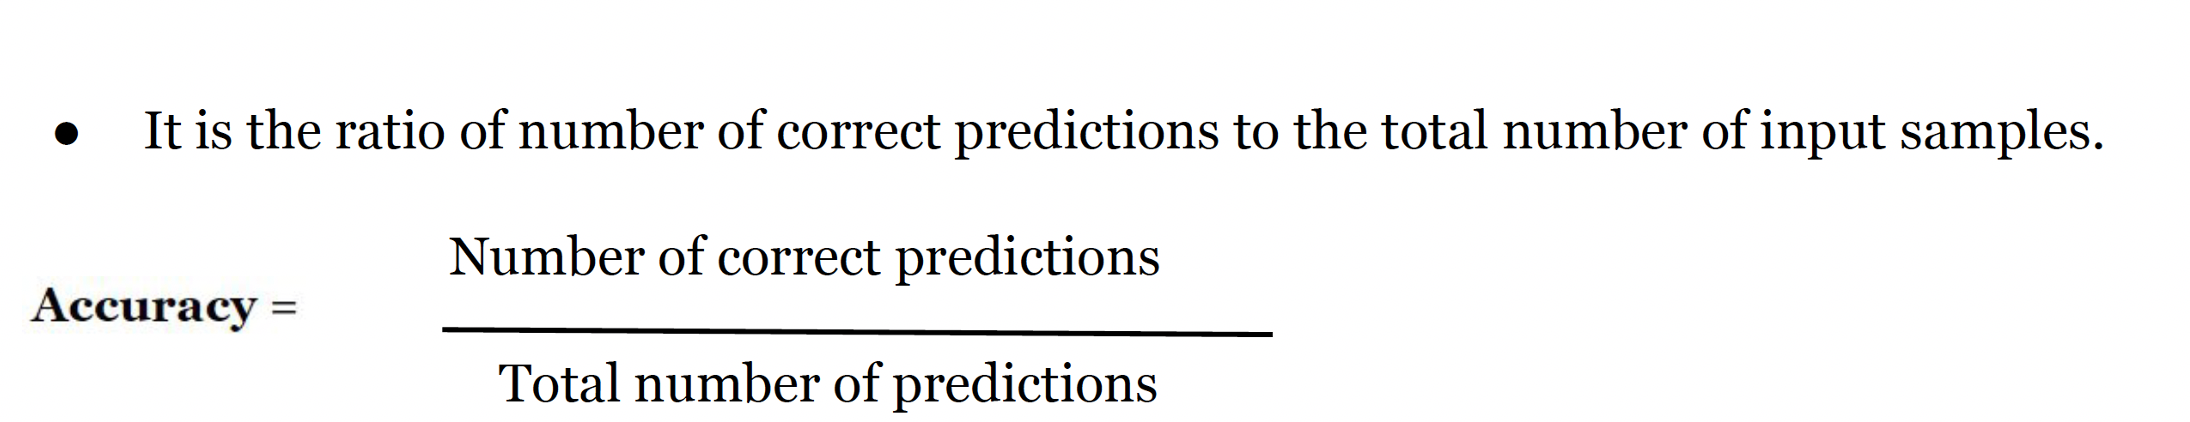

<a id = section502></a>

### 5.2 Model Evaluation using confusion matrix

A __confusion matrix__ is a __summary__ of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. <br/>
Below is a diagram showing a general confusion matrix.
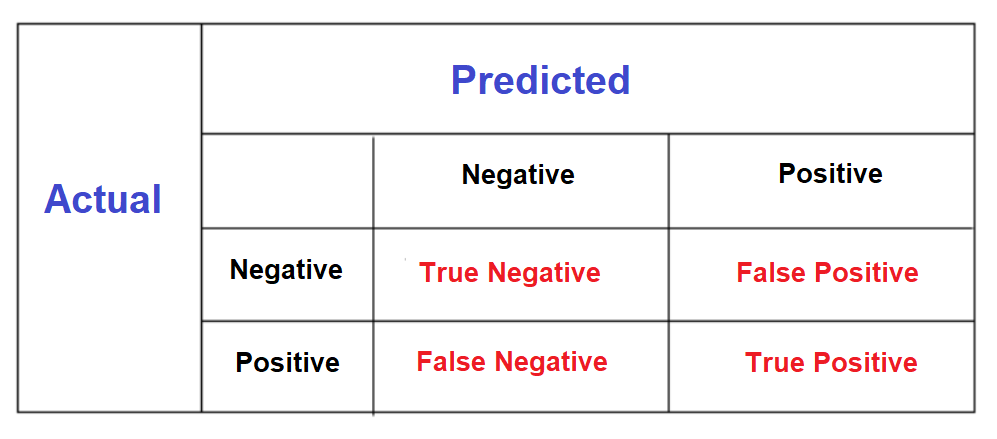

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix)


In [ ]:
c_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(c_matrix)

In [ ]:
c_matrix.index = ['Actual Died','Actual Survived']
c_matrix.columns = ['Predicted Died','Predicted Survived']
print(c_matrix)

This means 93 + 50 = __143 correct predictions__ & 23 + 13 = __36 false predictions__.